# Milk Quality Prediction
### Objectives
Techniques Used
- Data Cleaning
- Data Visualization
- Machine Learning Modeling

Algortihms Used
- KNN
- DecisionTree

Model Evaluation Methods Used
- Accuracy Score

<hr>

Let's load required libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as spp
%matplotlib inline

### Load Data From CSV File
- pH: This Column defines PH alus of the milk which ranges from 3 to 9.5
- Temprature: This Column defines Temprature of the milk which ranges from 34'C to 90'C
- Taste: This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good)
- Odor: This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) 
- FatThis Column defines Odor of the milk which is categorical data 0 (Low) or 1 (High)
- Turbidity: This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High)
- Color: This Column defines Color of the milk which ranges from 240 to 255
- Grade: This Column defines Grade (Target) of the milk which is categorical data Where 0 (Low&Bad) or 1 (Medium&Moderate) or 2 (High)

In [51]:
data = pd.read_csv('data.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


### Data Visualization and Analysis
Let’s see how many of each class is in our data set

In [52]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Color,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [53]:
data['Grade'].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

429 Low Quality, 374 Medium Quality, 256 High Quality

array([[<AxesSubplot: title={'center': 'pH'}>]], dtype=object)

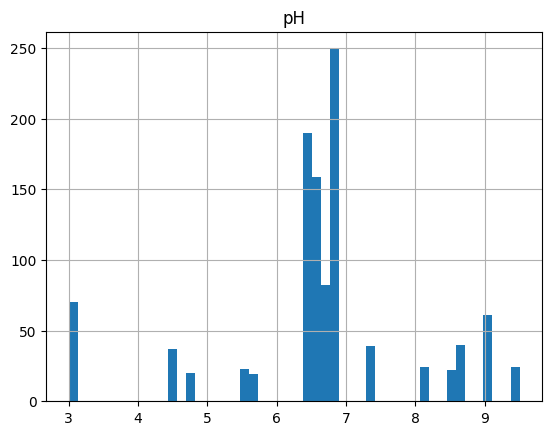

In [54]:
data.hist(column='pH', bins=50)

array([[<AxesSubplot: title={'center': 'Temprature'}>]], dtype=object)

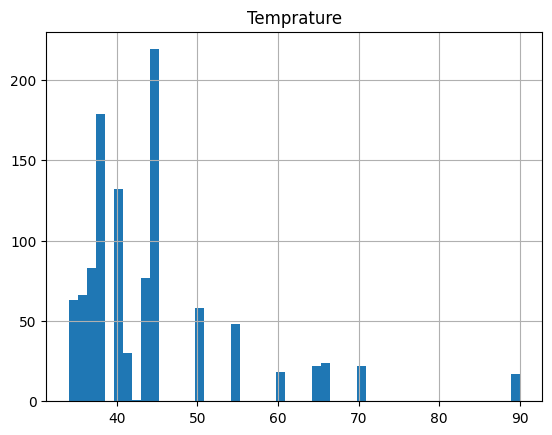

In [55]:
data.hist(column='Temprature', bins=50)

### Feature set
Let's convert the Pandas data frame to a Numpy array:

In [56]:
X = data[['pH','Temprature','Taste','Odor','Fat','Turbidity','Color']] .values
y = data[['Grade']] .values
X[0:5]

array([[  6.6,  35. ,   1. ,   0. ,   1. ,   0. , 254. ],
       [  6.6,  36. ,   0. ,   1. ,   0. ,   1. , 253. ],
       [  8.5,  70. ,   1. ,   1. ,   1. ,   1. , 246. ],
       [  9.5,  34. ,   1. ,   1. ,   0. ,   1. , 255. ],
       [  6.6,  37. ,   0. ,   0. ,   0. ,   0. , 255. ]])

### Normalize Data
Standardizing data, which involves giving the data a zero mean and unit variance, is a good practice to follow, especially for algorithms that rely on the distance between data points, such as KNN.

In [57]:
X = spp.Normalizer().fit(X).transform(X.astype(float))
X[0:5]

array([[0.02573211, 0.13645814, 0.0038988 , 0.        , 0.0038988 ,
        0.        , 0.99029623],
       [0.0258178 , 0.14082438, 0.        , 0.00391179, 0.        ,
        0.00391179, 0.98968244],
       [0.03321421, 0.27352882, 0.00390755, 0.00390755, 0.00390755,
        0.00390755, 0.96125841],
       [0.03690211, 0.13207071, 0.00388443, 0.00388443, 0.        ,
        0.00388443, 0.99053031],
       [0.02560573, 0.14354725, 0.        , 0.        , 0.        ,
        0.        , 0.98931215]])

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions the model makes on data that has not been trained on. If a model is trained and tested on the same dataset, the out of sample accuracy will likely be low due to overfitting. To improve accuracy, Train/Test Split can be used. This method involves dividing the dataset into mutually exclusive training and testing sets. The model is trained on the training set and tested on the testing set, providing a more realistic evaluation of out-of-sample accuracy for real-world problems.

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

### Classification
##### K nearest neighbor (KNN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
kcls = KNeighborsClassifier(n_neighbors=k)
kcls.fit(train_x,train_y)

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### Accuracy of other K
To choose the right K value in KNN, a part of the data should be set aside for testing the model. Starting from K=1, the accuracy of the model should be calculated and repeated by increasing K value. Based on results, the best K can be determined.

In [60]:
from sklearn.metrics import accuracy_score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = accuracy_score(test_y, yhat)
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConv

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Plot for other K

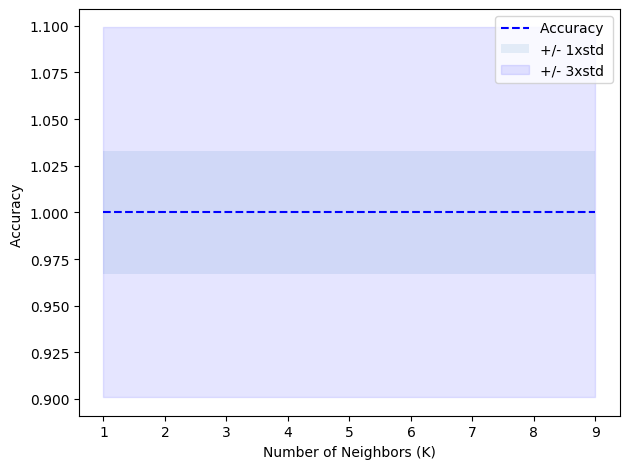

The best accuracy was 1.0 with k= 1


In [61]:
plt.plot(range(1,Ks),mean_acc,'b--')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Accuracy evaluation
Multilabel classification measures subset accuracy by calculating how closely actual and predicted labels match in the test set. The accuracy classification score function is equivalent to the jaccard_score function.

In [62]:
train_y_hat = kcls.predict(train_x)
test_y_hat = kcls.predict(test_x)
print('train accuracy score:' , accuracy_score(train_y,train_y_hat))
print('test accuracy score:' , accuracy_score(test_y,test_y_hat))

train accuracy score: 0.9929161747343566
test accuracy score: 1.0


### Other algorithms
Lets check other algorithms such as DecisionTree or LogisticRegression.

### DecisionTree
First, lets find the best max_depth:

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
model = DecisionTreeClassifier()
parameters = {'max_depth':range(1,20)}
grid_search = GridSearchCV(model,parameters , cv=KFold(n_splits=10), scoring='accuracy')
grid_search.fit(train_x, train_y)
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 9


Now we can classify our data:

In [64]:
dtc = DecisionTreeClassifier(criterion="entropy" , max_depth=9)
dtc.fit(train_x,train_y)
print("DecisionTrees's Accuracy: ", accuracy_score(test_y, dtc.predict(test_x)))

DecisionTrees's Accuracy:  1.0


We can even draw a plot for our tree:

In [65]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
dot_data = StringIO()
filename = "tree.png"
featureNames = data.columns[0:7]
out=tree.export_graphviz(dtc,feature_names=featureNames, out_file=dot_data, class_names= np.unique(train_y.astype('str')), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Conclusion
We can use both KNN and DecisionTree to predict milk quality. It depends on you which one you want to use.

### Author
Sahand Sabet (https://github.com/sahandsbt)
<hr>
<h3 align="center"> © Sa-Sa.ir 2023. All rights reserved. </h3>